# Lista 1

## `Questão 1`
Considere o conjunto de dados disponível em `artificial1d.csv` organizado em
duas colunas, `x` e `y`. Seja um modelo de regressão linear: 
$$\begin{aligned}
\hat{y} = f(x).
\end{aligned}$$

A) Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.  
  
B) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta re- sultante sobre os dados.  
  
C) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo SGD (gradiente descendente estocástico). Plote a reta resultante sobre os dados.


In [140]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [141]:
artificial_data = np.loadtxt('./artificial1d.csv', delimiter=',')
artificial_data

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,

### `OLS (mínimos quadrados ordinários)`

In [142]:
def mse_ols(x: np.ndarray, w: np.ndarray, y: np.ndarray):
    pred = x @ w
    error = y - pred
    mse = (error ** 2).mean()

    return mse

def rmse_ols(x: np.ndarray, w: np.ndarray, y: np.ndarray):
    return np.sqrt(mse_ols(x, w, y))

In [143]:
def ols(x: np.ndarray, y: np.ndarray):
    # Entradas do modelo
    X = x.copy()

    # Saída do modelo
    Y = y.copy()

    # Adicionando uma coluna de 1's para o termo independente
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Forma literal de calcular w
    # w_ols = np.linalg.inv(X.T @ X) @ X.T @ y

    # Forma mais eficiente de calcular w, pois não é necessário calcular a inversa de X.T @ X
    w_ols = np.linalg.solve(X.T @ X, X.T @ y)

    # Calculando o MSE
    mse = mse_ols(X, w_ols, Y)
    
    return w_ols, mse

In [144]:
x_artificial_data = artificial_data[:, :-1]
x_artificial_data.shape

(30, 1)

In [145]:
y_artificial_data = artificial_data[:, [-1]]
y_artificial_data.shape

(30, 1)

In [146]:
w_artificial_data_ols, mse_artificial_data_ols = ols(x_artificial_data, y_artificial_data)

#### Parâmetros do modelo e **MSE (Erro Quadrático Médio)** obitidos pelo algoritmo

In [147]:
print(f"Parâmetros OLS: W0: {w_artificial_data_ols[0][0]}, W1: {w_artificial_data_ols[1][0]}")

Parâmetros OLS: W0: 0.06761792463834032, W1: 1.5748651690368318


In [148]:
print(f"MSE OLS: {mse_artificial_data_ols}")

MSE OLS: 0.21340090132936992


#### Plote da reta resultante sobre os dados

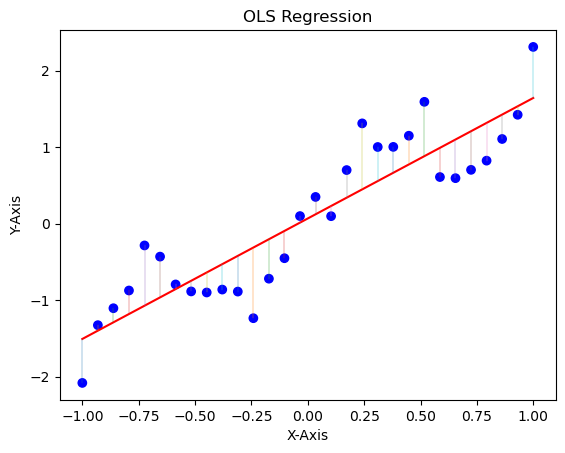

In [149]:
fig, ax = plt.subplots()

x_range_ols = np.linspace(x_artificial_data.min(), x_artificial_data.max())
y_range_ols = w_artificial_data_ols[0] + w_artificial_data_ols[1] * x_range_ols

ax.set_title("OLS Regression")
ax.set_ylabel("Y-Axis")
ax.set_xlabel("X-Axis")

ax.scatter(x_artificial_data, y_artificial_data, color='blue', marker='o', linestyle='')
ax.plot(x_range_ols, y_range_ols, color='red')

for i in range(len(x_artificial_data)):
    ax.plot([x_artificial_data[i], x_artificial_data[i]], [y_artificial_data[i], w_artificial_data_ols[0] + w_artificial_data_ols[1] * x_artificial_data[i]], linewidth='0.3')

plt.show()

### `GD - Gradiente Descendente`

In [150]:
def mse_gd(x: np.ndarray, w: np.ndarray, y: np.ndarray):
    pred = x @ w
    error = y - pred
    mse = (error * error).mean()
    # mse1 = (error ** 2).sum() / error.shape[0]
    # print(f'mse: {mse}')
    # print(f'mse 1: {mse1}')

    return mse

In [151]:
# Gradiente descendente
def gd(x: np.ndarray, y: np.ndarray, alpha: float = 0.001, max_iterations: int = 100000, stopping_error: float = 1e-10):
    # Importando features e saídas
    X = x.copy()
    Y = y.copy()

    # Adicionando uma coluna de 1's para o termo independente
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Inicializando os pesos
    w_gd = np.zeros((X.shape[1], 1))

    # Taxa de aprendizado
    # alpha = 0.00001

    # Número máximo de iterações
    # max_iterations = 100000

    errors_list_gd = np.empty((max_iterations, X.shape[0]))
    mse_list_gd = np.empty((max_iterations, 1))

    # Gradiente descendente
    for iter in range(max_iterations):

        # Calculando o erro
        pred_gd = X @ w_gd
        error_gd = Y - pred_gd
        
        w_gd[0] = w_gd[0] + alpha * error_gd.mean(axis = 0)
        w_gd[1:] = w_gd[1:] + alpha * (X[:,[1]].T @ error_gd) / X.shape[0]

        # Calculando o MSE e registrando o MSE e os Erros
        errors_list_gd[[iter], :] = error_gd.reshape(1, -1)
        mse_list_gd[iter] = mse_gd(X, w_gd, Y)

        # Parar caso o erro esteja abaixo do mínimo aceitável
        # if(mse < stopping_error):
        #     print(f'GD encerrado precocemente pois os erros estão baixos o suficiente')
        #     break
    
    return w_gd, mse_gd(X, w_gd, y), errors_list_gd, mse_list_gd

In [209]:
w_artificial_data_gd, mse_artificial_data_gd, errors_list_gd, mse_list_gd = gd(x_artificial_data, y_artificial_data, alpha=0.01, max_iterations=1750)

#### Parâmetros do modelo e **MSE (Erro Quadrático Médio)** final obitidos pelo algoritmo

In [210]:
w_artificial_data_gd

array([[0.06761792],
       [1.57181512]])

In [211]:
mse_artificial_data_gd

0.2134042161143472

#### Plote da reta resultante sobre os dados

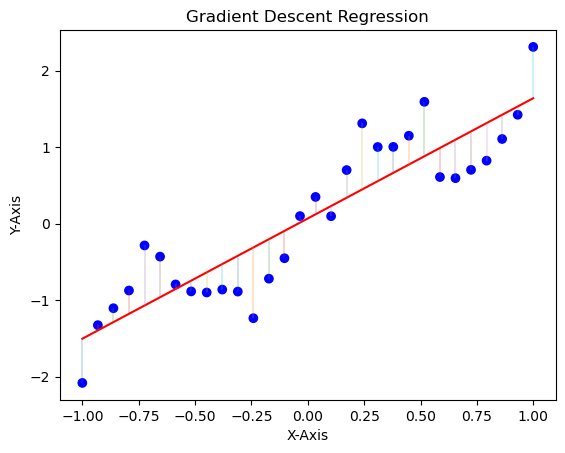

In [212]:
fig, ax = plt.subplots()

x_range_gd = np.linspace(x_artificial_data.min(), x_artificial_data.max())
y_range_gd = w_artificial_data_gd[0] + w_artificial_data_gd[1] * x_range_gd

ax.set_title("Gradient Descent Regression")
ax.set_ylabel("Y-Axis")
ax.set_xlabel("X-Axis")

ax.scatter(x_artificial_data, y_artificial_data, color='blue', marker='o', linestyle='')
ax.plot(x_range_gd, y_range_gd, color='red')

for i in range(len(x_artificial_data)):
    ax.plot([x_artificial_data[i], x_artificial_data[i]], [y_artificial_data[i], w_artificial_data_gd[0] + w_artificial_data_gd[1] * x_artificial_data[i]], linewidth='0.3')

plt.show()

#### Plote da curva de aprendizagem

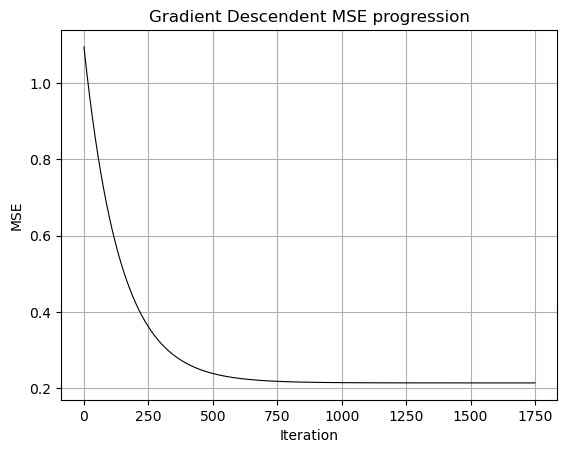

In [213]:
fig, ax = plt.subplots()

ax.set_title("Gradient Descendent MSE progression")
ax.set_ylabel("MSE")
ax.set_xlabel("Iteration")

ax.plot(np.arange(mse_list_gd.shape[0]), mse_list_gd, color='black', linewidth='0.8')
ax.grid(True)

plt.show()

### `SGD - Gradiente Descendente Estocástico`

In [214]:
# Gradiente descendente estocástico
def sgd(x: np.ndarray, y: np.ndarray, alpha: float = 0.001, max_epochs: int = 1000, stopping_error: float = 1e-10):
    # Importando features e saídas
    X = x.copy()
    Y = y.copy()

    # Adicionando uma coluna de 1's para o termo independente
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Inicializando os pesos
    w_sgd = np.zeros((X.shape[1], 1))

    # Taxa de aprendizado
    # alpha = 0.00001

    # Número máximo de epochs
    # max_epochs = 100000

    errors_list_sgd = np.empty((max_epochs * X.shape[0], X.shape[0]))
    mse_list_sgd = np.empty((max_epochs * X.shape[0], 1))

    # Gradiente descendente estocástico
    for epoch in range(max_epochs):
        # Permutando dados (entradas e saídas)
        XY = np.hstack((X, Y))
        XY = np.random.permutation(XY)
        X = XY[:, :-1]
        Y = XY[:, [-1]]

        for entry in range(X.shape[0]):
            # Calculando o erro
            pred_sgd = X[entry] @ w_sgd
            error_sgd = Y[entry] - pred_sgd
            
            w_sgd[0] = w_sgd[0] + alpha * error_sgd
            w_sgd[1:] = w_sgd[1:] + alpha * (X[entry,[1]].T * error_sgd)

            # Calculando o MSE e registrando o MSE e os Erros
            errors_list_sgd[[epoch * X.shape[0] + entry], :] = error_sgd.reshape(1, -1)
            mse_list_sgd[epoch * X.shape[0] + entry] = mse_gd(X, w_sgd, Y)

            # Parar caso o erro esteja abaixo do mínimo aceitável
            # if(mse < stopping_error):
            #     print(f'SGD encerrado precocemente pois os erros estão baixos o suficiente')
            #     break
    
    return w_sgd, mse_gd(X, w_sgd, y), errors_list_sgd, mse_list_sgd

In [221]:
w_artificial_data_sgd, mse_artificial_data_sgd, errors_list_sgd, mse_list_sgd = sgd(x_artificial_data, y_artificial_data, alpha= 0.01, max_epochs=60)

#### Parâmetros do modelo e **MSE (Erro Quadrático Médio)** final obitidos pelo algoritmo

In [222]:
w_artificial_data_sgd

array([[0.06696998],
       [1.5730582 ]])

In [223]:
mse_artificial_data_sgd

2.088392316855897

#### Plote da reta resultante sobre os dados

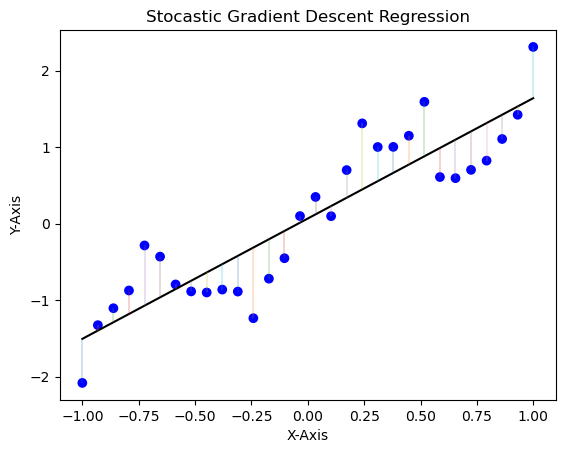

In [224]:
fig, ax = plt.subplots()

x_range_sgd = np.linspace(x_artificial_data.min(), x_artificial_data.max())
y_range_sgd = w_artificial_data_sgd[0] + w_artificial_data_sgd[1] * x_range_gd

ax.set_title("Stocastic Gradient Descent Regression")
ax.set_ylabel("Y-Axis")
ax.set_xlabel("X-Axis")

ax.scatter(x_artificial_data, y_artificial_data, color='blue', marker='o', linestyle='')
ax.plot(x_range_sgd, y_range_sgd, color='black')

for i in range(len(x_artificial_data)):
    ax.plot([x_artificial_data[i], x_artificial_data[i]], [y_artificial_data[i], w_artificial_data_gd[0] + w_artificial_data_sgd[1] * x_artificial_data[i]], linewidth='0.3')

plt.show()

#### Plote da curva de aprendizagem

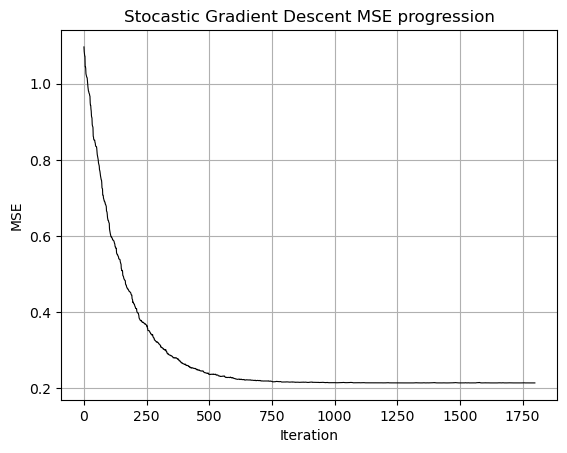

In [225]:
fig, ax = plt.subplots()

ax.set_title("Stocastic Gradient Descent MSE progression")
ax.set_ylabel("MSE")
ax.set_xlabel("Iteration")

ax.plot(np.arange(mse_list_sgd.shape[0]), mse_list_sgd, color='black', linewidth='0.8')
ax.grid(True)

plt.show()

## `Questão 2`
Considere o conjunto de dados disponível em boston.csv, organizado em 14 colunas, sendo as 13 primeiras colunas os atributos e a última coluna a saída.  
Os 13 atributos são usados na predição de preços de casas em Boston na década de 1970.